In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import tables

In [17]:
def read_data():
    lc = dict()
    filter_curves = dict()
    h5file = tables.open_file("../iPTF16abc.h5", mode="r")
    table = h5file.root.photometry.photometry
    
    # P48 light curve
    for filter_name in ["g", "R"]:
        key = "P48_%s" % filter_name
        data = np.array([(row["time"], row["flux"], row["flux_err"])
                         for row in table.where(
                             "(telescope == b'P48') & (filter_name == b'%s')" % filter_name)
                        ],
                        dtype=[("time", "f"), ("flux", "f"), ("flux_err", "f")])
        np.sort(data, order=["time"])
        lc[key] = data
    
    # P60 light curve
    for filter_name in ["g", "r", "i"]:
        key = "P60_%s" % filter_name
        data = np.array([(row["time"], row["flux"], row["flux_err"])
                         for row in table.where(
                             u"(telescope == b'P60') & (filter_name == b'%s')" % filter_name)
                        ],
                        dtype=[("time", "f"), ("flux", "f"), ("flux_err", "f")])
        np.sort(data, order=["time"])
        lc[key] = data
    #Swift light curve
    for filter_name in ["V", "B", "U", "UVW1", "UVM2", "UVW2"]:
        key = "UVOT_%s" % filter_name
        data = np.array([(row["time"], row["flux"], row["flux_err"])
                         for row in table.where(
                             u"(telescope == b'Swift') & (filter_name == b'%s')" % filter_name)
                        ],
                        dtype=[("time", "f"), ("flux", "f"), ("flux_err", "f")])
        np.sort(data, order=["time"])
        lc[key] = data
        
    h5file.close()
        
    return lc

In [18]:
lc = read_data()

In [19]:
lc.keys()

dict_keys(['UVOT_UVW1', 'UVOT_U', 'P60_r', 'UVOT_V', 'UVOT_UVM2', 'UVOT_B', 'P48_g', 'P60_i', 'P60_g', 'P48_R', 'UVOT_UVW2'])

phase=-15.8
phase=-15.6
phase=-13.6
phase=-11.3
phase=-7.5
phase=-5.7
phase=+6.3
phase=+18.8
phase=+20.4


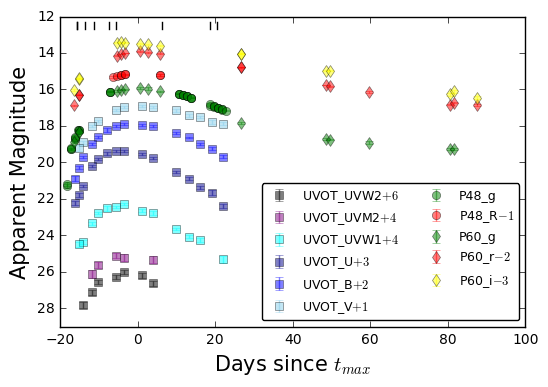

In [23]:
t_max = 57499.650
colors = {"UVW2": "black",
          "UVM2": "Purple",
          "UVW1": "Cyan",
          "U": "DarkBlue",
          "B": "Blue",
          "V": "SkyBlue", 
          "g": "Green",
          "R": "Red", 
          "r": "Red",
          "i": "Yellow"}
markers = {"UVOT": "s", 
           "P48": "o",
           "P60": "d"}
offsets = {"UVW2": 6,
           "UVM2": 4,
           "UVW1": 4,
           "U": 3,
           "B": 2,
           "V": 1,
           "g": 0,
           "R": -1,
           "r": -2,
           "i": -3}
for key in ["UVOT_UVW2", "UVOT_UVM2", "UVOT_UVW1", "UVOT_U", "UVOT_B", "UVOT_V",
            "P48_g", "P48_R", "P60_g", "P60_r", "P60_i"]:
    tel = key.split("_")[0]
    filter_name = key.split("_")[1]
    val = lc[key]
    idx = val["flux"] >= 5. * val["flux_err"]
    t = val[idx]["time"]
    mag = -2.5 * np.log10(val[idx]["flux"] / 3631)
    mag_err = 1.0857 * val[idx]["flux_err"] / val[idx]["flux"]
    plt.errorbar(t - t_max,
                 mag+ offsets[filter_name], 
                 yerr=mag_err,
                 color=colors[filter_name],
                 marker=markers[tel],
                 linestyle='none',
                 alpha=0.5,
                 label=key + "$%+i$" % offsets[filter_name] if offsets[filter_name] != 0 else key
                )
_ = plt.ylim(28, 12)

# spectroscopic follow-up epochs
spec_epochs = [57483.88, 57484.01, 57486.01, 57488.38, 57492.20,
               57494.00, 57506.00, 57518.42, 57520.03]
for epoch in spec_epochs:
    t = epoch - t_max
    print("phase=%+4.1f" % t)
    plt.plot([t, t], [12.3, 12.7], color='k', linewidth=1)

plt.xlabel("Days since $t_{max}$", fontsize=15)
plt.ylabel("Apparent Magnitude", fontsize=15)
plt.xlim(-20, 100)
plt.ylim(29, 12)
plt.legend(loc="lower right", numpoints=1, ncol=2, prop={'size':9}, fancybox=True)
plt.savefig("lightcurve.pdf")